In [138]:
import numpy as np
from types import SimpleNamespace
from scipy import optimize
par =  SimpleNamespace()
sol = SimpleNamespace()
opt = SimpleNamespace()
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2
from inaguralcode import HouseholdSpecializationModelClass


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#Question 1

c:\Users\Lenovo\.conda\IntroProg-lectures\projects\inaguralcode.py:67: RuntimeWarning: divide by zero encountered in power
  H =((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma/(par.sigma-1)))


Text(0.5, 0, '$\\frac{H_{F}}{H_{M}}$')

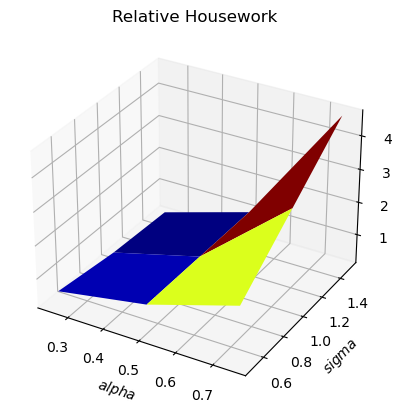

In [139]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt # baseline module
from matplotlib import cm # for colormaps
HHS = HouseholdSpecializationModelClass()
N = 3
shape_tuble = (N,N)
alphalist = (0.25,0.50,0.75)
sigmalist = (0.5,1.0,1.5)

alpha_vec = np.empty(shape_tuble)
sigma_vec = np.empty(shape_tuble)
HFHM_vec = np.empty(shape_tuble)


for i, a in enumerate(alphalist):
    for j, s in enumerate(sigmalist):
        HHS.par.alpha = a
        HHS.par.sigma = s
        z = HHS.solve_discrete()
        HFHM = z.HF/z.HM
        alpha_vec[i,j] = a
        sigma_vec[i,j] = s
        HFHM_vec[i,j] = HFHM
     #print(HHS.solve_discrete(do_print=True))
#print(a)
#print(f'LM = {HHS.opt.LM:.3f}')
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
ax.plot_surface(alpha_vec, sigma_vec, HFHM_vec, cmap=cm.jet); # create surface plot in the axis
ax.set_title('Relative Housework')
ax.set_xlabel('$alpha$') # Notice latex syntax
ax.set_ylabel('$sigma$')
ax.set_zlabel(r'$\frac{H_{F}}{H_{M}}$')
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots

# Question 2

Text(0, 0.5, '$log\\left(\\frac{H_{F}}{H_{M}}\\right)$')

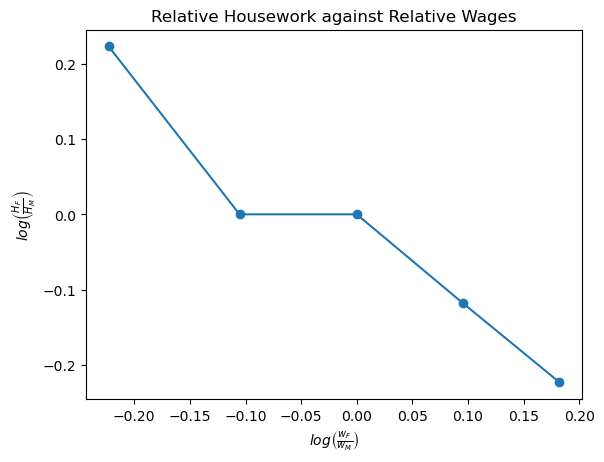

In [140]:
# a. reset the parameter values
HHS.par.sigma = 1
HHS.par.alpha = 0.5 
wflist = (0.8, 0.9, 1.0, 1.1,1.2)

# b. create the figure
fig = plt.figure()

# c. create the plot 
ax = fig.add_subplot(1,1,1)

# d. create empty vectors for the independent and dependent values
lnwFwM_vec = np.empty(5)
lnHFHM_vec = np.empty(5)

# e. fill the vectors

for i, wf1 in enumerate(wflist):
    HHS.par.wF = wf1
    lnwFwM = np.log(HHS.par.wF/HHS.par.wM)
    x = HHS.solve_discrete()
    lnHFHM = np.log(x.HF/x.HM)
    lnwFwM_vec[i] = lnwFwM
    lnHFHM_vec[i] = lnHFHM

# f. plot
ax.plot(lnwFwM_vec,lnHFHM_vec) # c is the color, the argument is the color in rgb format (in percentages of 255)    
ax.scatter(lnwFwM_vec,lnHFHM_vec)
ax.set_title('Relative Housework against Relative Wages')
ax.set_xlabel(r'$log\left(\frac{w_{F}}{w_{M}}\right)$')
ax.set_ylabel(r'$log\left(\frac{H_{F}}{H_{M}}\right)$')


# Question 3

0.22519958544128285
9.754729058551197e-05
2.154359799344263e-09
-8.680131447473675e-05
-0.18662625800161153


Text(0, 0.5, '$log\\left(\\frac{H_{F}}{H_{M}}\\right)$')

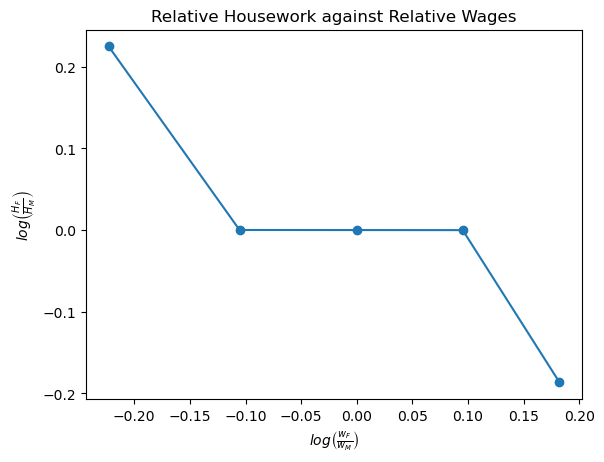

In [141]:
# a. reset the parameter values
HHS.par.sigma = 1
HHS.par.alpha = 0.5 
wflist = (0.8, 0.9, 1.0, 1.1,1.2)

# b. create the figure
fig = plt.figure()

# c. create the plot 
ax = fig.add_subplot(1,1,1)

# d. create empty vectors for the independent and dependent values
lnwFwM_vec = np.empty(5)
lnHFHM_vec = np.empty(5)

# e. fill the vectors

for i, wf1 in enumerate(wflist):
    HHS.par.wF = wf1
    lnwFwM = np.log(HHS.par.wF/HHS.par.wM)
    y = HHS.solve_continue()
    lnHFHM = np.log(y.HF/y.HM)
    print(lnHFHM)
    lnwFwM_vec[i] = lnwFwM
    lnHFHM_vec[i] = lnHFHM


# f. plot
ax.plot(lnwFwM_vec,lnHFHM_vec) # c is the color, the argument is the color in rgb format (in percentages of 255)    
ax.scatter(lnwFwM_vec,lnHFHM_vec)
ax.set_title('Relative Housework against Relative Wages')
ax.set_xlabel(r'$log\left(\frac{w_{F}}{w_{M}}\right)$')
ax.set_ylabel(r'$log\left(\frac{H_{F}}{H_{M}}\right)$')


# Question 4

c:\Users\Lenovo\.conda\IntroProg-lectures\projects\inaguralcode.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  H =((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma/(par.sigma-1)))
c:\Users\Lenovo\.conda\IntroProg-lectures\projects\inaguralcode.py:67: RuntimeWarning: invalid value encountered in double_scalars
  H =((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma/(par.sigma-1)))
c:\Users\Lenovo\.conda\IntroProg-lectures\projects\inaguralcode.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  H = HM**(1-par.alpha)*HF**par.alpha
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14752\2020204427.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  lnHFHM = np.log(y.HF / y.HM)
c:\Users\Lenovo\.conda\IntroProg-lectures\projects\inaguralcode.py:63: RuntimeWarning: invalid value encountered in double_scalars
  H = HM**(1-par.alpha)*HF**par.alp

The minimizing parameter values are: alpha = 0.3000, sigma = 1.7000
which results in the beta values: beta0 = 0.3803, beta1 = -0.0000
The sum of the squared errors are therefore: 0.0104


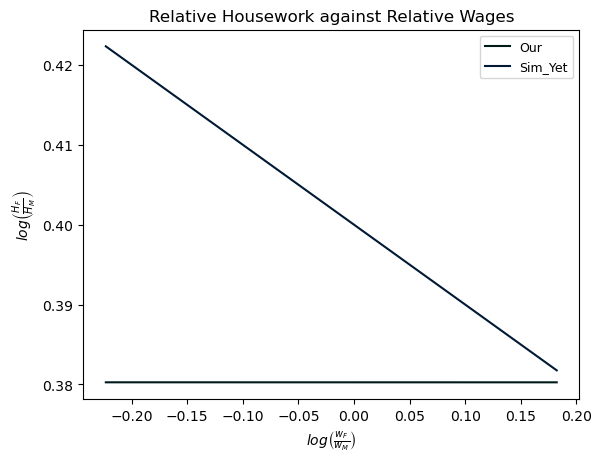

In [142]:
best_res = float('inf')

best_alpha = None
best_sigma = None
best_beta0 = None
best_beta1 = None

alpha_list = np.linspace(0.1,1,10)
sigma_list = np.linspace(0.1,2,20)

# a. run Question 3 through a for-loop with varying alpha and sigma values
for a in alpha_list:
    for s in sigma_list:
        HHS = HouseholdSpecializationModelClass()
        HHS.par.sigma = a
        HHS.par.alpha = s
        wflist = (0.8, 0.9, 1.0, 1.1, 1.2)

        # b. create empty vectors for the independent and dependent value
        lnwFwM_vec = np.empty(5)
        lnHFHM_vec = np.empty(5)

        # c. fill the vector
        for i, wf1 in enumerate(wflist):
            HHS.par.wF = wf1
            lnwFwM = np.log(HHS.par.wF / HHS.par.wM)
            y = HHS.solve_continue()
            lnHFHM = np.log(y.HF / y.HM)
            lnwFwM_vec[i] = lnwFwM
            lnHFHM_vec[i] = lnHFHM
        # d. run the regression
        x = lnwFwM_vec
        y = lnHFHM_vec
        A = np.vstack([np.ones(x.size), x]).T
        HHS.sol.beta0, HHS.sol.beta1 = np.linalg.lstsq(A, y, rcond=None)[0]
        new_res = (0.4 - HHS.sol.beta0) ** 2 + (-0.1 - HHS.sol.beta1) ** 2
        # e. check if the sum of the squared errors are smaller than the previous best estimate
        if new_res < best_res:
            best_res = new_res
            best_alpha = a
            best_sigma = s
            best_beta0 = HHS.sol.beta0
            best_beta1 = HHS.sol.beta1

# f. print results
print(f'The minimizing parameter values are: alpha = {best_alpha:.4f}, sigma = {best_sigma:.4f}\nwhich results in the beta values: beta0 = {best_beta0:.4f}, beta1 = {best_beta1:.4f}\nThe sum of the squared errors are therefore: {best_res:.4f}')


# g. fill vectors to present the model values of our model and Siminski and Yetsenga (2022) 
our_values = np.empty(5)
Sim_Yet_values = np.empty(5)
for i, wf1 in enumerate(wflist):
    HHS.par.wF = wf1
    lnwFwM = np.log(HHS.par.wF / HHS.par.wM)
    our_values[i] = best_beta0+best_beta1*np.log(wf1)
    Sim_Yet_values[i] = 0.4-0.1*np.log(wf1)



# h. create the figure
fig = plt.figure()

# i. create the plot 
ax = fig.add_subplot(1,1,1)

ax.plot(lnwFwM_vec,our_values,label='Our',c=(0.,0.1,0.1)) # c is the color, the argument is the color in rgb format (in percentages of 255)    
ax.plot(lnwFwM_vec,Sim_Yet_values, label='Sim_Yet',c=(0.,0.1,0.2)) # c is the color, the argument is the color in rgb format (in percentages of 255)    
ax.set_title('Relative Housework against Relative Wages')
ax.set_xlabel(r'$log\left(\frac{w_{F}}{w_{M}}\right)$')
ax.set_ylabel(r'$log\left(\frac{H_{F}}{H_{M}}\right)$')
ax.legend(loc='upper right',prop={'size':9}); # Activate legend (uses the labels in ax.plot())



# Question 5

The minimizing sigma value is: 0.2727
which results in the beta values: beta0 = 0.0001, beta1 = -0.0958
The sum of the squared errors are therefore: 0.1599
[ 0.02152304  0.01023501  0.00013751 -0.00899678 -0.01733574]
[0.42231436 0.41053605 0.4        0.39046898 0.38176784]


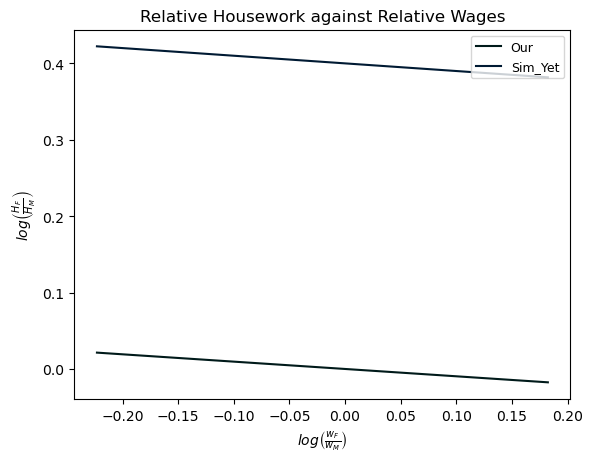

In [143]:
best_res = float('inf')

best_sigma = None
best_beta0 = None
best_beta1 = None

sigma_list = np.linspace(0.1,2,100)

# a. run Question 3 through a for-loop with varying sigma values and alpha = 0.5
for s in sigma_list:
    HHS = HouseholdSpecializationModelClass()
    HHS.par.sigma = s
    HHS.par.alpha = 0.5
    wflist = (0.8, 0.9, 1.0, 1.1, 1.2)
    # b. create empty vectors for the independent and dependent value
    lnwFwM_vec = np.empty(5)
    lnHFHM_vec = np.empty(5)
    # c. fill the vector
    for i, wf1 in enumerate(wflist):
        HHS.par.wF = wf1
        lnwFwM = np.log(HHS.par.wF / HHS.par.wM)
        y = HHS.solve_continue()
        lnHFHM = np.log(y.HF / y.HM)
        lnwFwM_vec[i] = lnwFwM
        lnHFHM_vec[i] = lnHFHM
    # d. run the regression
    x = lnwFwM_vec
    y = lnHFHM_vec
    A = np.vstack([np.ones(x.size), x]).T
    HHS.sol.beta0, HHS.sol.beta1 = np.linalg.lstsq(A, y, rcond=None)[0]
    new_res = (0.4 - HHS.sol.beta0) ** 2 + (-0.1 - HHS.sol.beta1) ** 2
    # e. check if the sum of the squared errors are smaller than the previous best estimate
    if new_res < best_res:
        best_res = new_res
        best_sigma = s
        best_beta0 = HHS.sol.beta0
        best_beta1 = HHS.sol.beta1


# f. print results
print(f'The minimizing sigma value is: {best_sigma:.4f}\nwhich results in the beta values: beta0 = {best_beta0:.4f}, beta1 = {best_beta1:.4f}\nThe sum of the squared errors are therefore: {best_res:.4f}')



our_values = np.empty(5)
Sim_Yet_values = np.empty(5)
for i, wf1 in enumerate(wflist):
    HHS.par.wF = wf1
    lnwFwM = np.log(HHS.par.wF / HHS.par.wM)
    our_values[i] = best_beta0+best_beta1*np.log(wf1)
    Sim_Yet_values[i] = 0.4-0.1*np.log(wf1)

print(our_values)
print(Sim_Yet_values)


# b. create the figure
fig = plt.figure()

# c. create the plot 
ax = fig.add_subplot(1,1,1)

ax.plot(lnwFwM_vec,our_values,label='Our',c=(0.,0.1,0.1)) # c is the color, the argument is the color in rgb format (in percentages of 255)    
ax.plot(lnwFwM_vec,Sim_Yet_values, label='Sim_Yet',c=(0.,0.1,0.2)) # c is the color, the argument is the color in rgb format (in percentages of 255)    
ax.set_title('Relative Housework against Relative Wages')
ax.set_xlabel(r'$log\left(\frac{w_{F}}{w_{M}}\right)$')
ax.set_ylabel(r'$log\left(\frac{H_{F}}{H_{M}}\right)$')
ax.legend(loc='upper right',prop={'size':9}); # Activate legend (uses the labels in ax.plot())

